Go to directory:~/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR/GEOCODE
save_roipac.py geo_timeseries_ECMWF_demErr_refDate_plane.h5 20171022 --ref-date 20160101


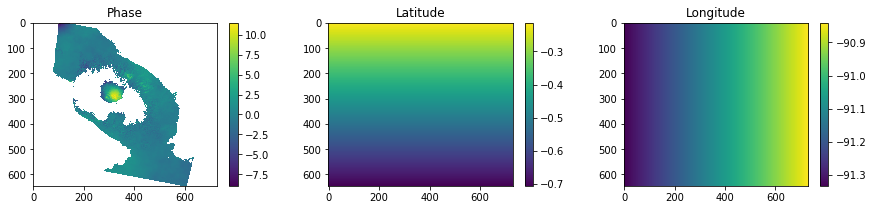

In [1]:
# read data/lats/lons
import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.utils import readfile

work_dir = '~/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR/GEOCODE'
os.chdir(os.path.expanduser(work_dir))
print('Go to directory:'+work_dir)

# generate interferogram from timeseries
cmd = 'save_roipac.py geo_timeseries_ECMWF_demErr_refDate_plane.h5 20171022 --ref-date 20160101'
print(cmd)
#os.system(cmd)

# read deformation phase
ts_file = '160101-171022.unw'
data, atr = readfile.read(ts_file)
mask_file = 'geo_maskTempCoh.h5'
mask = readfile.read(mask_file)[0]
data[mask==0] = np.nan

# get lat/lon
lat0 = float(atr['Y_FIRST'])
lon0 = float(atr['X_FIRST'])
lat_step = float(atr['Y_STEP'])
lon_step = float(atr['X_STEP'])
lat_num = int(atr['LENGTH'])
lon_num = int(atr['WIDTH'])
lat1 = lat0 + lat_step * lat_num
lon1 = lon0 + lon_step * lon_num
lats, lons = np.mgrid[lat0:lat1:lat_num*1j,
                      lon0:lon1:lon_num*1j]

# dislay
display = True
if display:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15, 3])
    im = ax1.imshow(data); ax1.set_title('Phase');     cbar = fig.colorbar(im, ax=ax1)
    im = ax2.imshow(lats); ax2.set_title('Latitude');  cbar = fig.colorbar(im, ax=ax2)
    im = ax3.imshow(lons); ax3.set_title('Longitude'); cbar = fig.colorbar(im, ax=ax3)
    plt.show()

In [2]:
# save data into text file
out_file = os.path.splitext(ts_file)[0]+'.txt'
np.savetxt(out_file,
           np.hstack((lats.reshape(-1, 1),
                      lons.reshape(-1, 1),
                      data.reshape(-1, 1))),
           fmt='%s',
           delimiter='\t')
print('saved to '+out_file)

saved to 160101-171022.txt
